# Benefits of using blended generative adversarial network images to augment classification model training data sets Object Detection Code

BEN: 

# Blended GAN Object Detection Research

This notebook supports the research on using blended Generative Adversarial Network (GAN) images to augment training datasets for object detection models. The goal is to demonstrate how blending GAN-generated images with real images can improve the accuracy and robustness of models like YOLOv4.

In this notebook, we will:
- Train object detection models on datasets with and without GAN-generated images.
- Evaluate the performance improvements achieved through data augmentation using GANs.


## Imports

# Cloning and Building Darknet
The following cells will clone darknet from AlexeyAB's famous repository, adjust the Makefile to enable OPENCV and GPU for darknet and then build darknet.

BEN:

### Note on warnings: Do not worry about any warnings when you run the '!make' cell!

In [ ]:
  # clone darknet repo
!git clone https://github.com/AlexeyAB/darknet


Cloning into 'darknet'...
remote: Enumerating objects: 15490, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 15490 (delta 10), reused 18 (delta 8), pack-reused 15460
Receiving objects: 100% (15490/15490), 14.10 MiB | 11.94 MiB/s, done.
Resolving deltas: 100% (10397/10397), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

Define Helper Functions

These three functions are helper functions that will allow you to show the image in your Colab Notebook after running your detections, as well as upload and download images to and from your Cloud VM.

BEN: Consider moving imorts up to the top unless they are required within this function. I would move them to the top.

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload()
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# run darknet detection on test images
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x

**bold text**# Connect Google Drive

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Google Drive
Images can also be uploaded from your Google Drive and easily have YOLOv4 detections run on them.

You will want to run the below cell to mount your google drive into the cloud VM so that you can access its contents. It is that easy!

**NOTE:** We will be creating a symbolic link between '/content/gdrive/My\ Drive/' and '/mydrive.

This means we are just creating a shortcut '/mydrive' to map to the contents within the folder '/content/gdrive/My\ Drive/'.

The reason for this is that sometime having the space in 'My Drive' folder path can cause issues when running certain commands. This symbolic link will stop this from happening!

Now you can run YOLOv4 with images from Google Drive using the darknet command:
```
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights /mydrive/<path to image>
```
I recommend saving images within a folder called 'images' at the root level of your Google Drive.

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 141725z_08_labels.csv
'280 .MP4'
'655- Independent_Study_2.gdoc'
'8.5. SmoothingMethods v2.xls'
 Additional_Trials.gsheet
 Altomontes_Facebook_Reviews_Results.csv
 annotations
 Approaching_ML
'ARB (fillable).pdf'
' (Athlete'\''s Version) 12 Week Versatility DUP Program.gsheet'
'(Athlete'\''s Version) 12 Week Versatility DUP Program.gsheet'
 bays29.xlsx
'Benjamin McCloskey.doc'
 Bourbon_Metaheuristic.pdf
 Business_Notes.gdoc
 CGAN
 cgan_pytorch
 cGAN_thesis.ipynb
'Chapter 26.gslides'
'Chinese Oral 2.gdoc'
'Chinese Research Project.gdoc'
'Colab Notebooks'
'Copy of 16 Week Complete Program - Calgary Barbell.gsheet'
'Copy of Calgary Barbell 16 Week (Revised) LB + KG | LiftVault.com.gsheet'
'Copy of PHAT Workout Log TEMPLATE | LiftVault.com.gsheet'
 cropping_image_example.jpg
 Data_Science_Course_Assignment_1.gdoc
'Dataset Iterations.xlsx'
'Day_2 Presentation.gslides'
 DCGAN_MISH
'Discourse Coherence.gdoc'
'DSS Notes.gdoc'
'DSS _Project.gdoc'
 file.txt
 Final_Assigment.gslides
'Final_Prese

In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

### Download Files to Local Machine or Google Drive from Cloud VM
You can also easily download images from your cloud VM to save to your local machine or Google Drive.

#### Method 1: Local Machine

You can do it easily by using our helper function 'download()' or by right clicking the image in the File Explorer on the left side of your notebook and hitting **Download**. Files will be saved to your *Downloads* folder.

This is useful if you want to download the **'predictions.jpg'** images that the object detector outputs.

#### Method 2: Google Drive
A simple copy command can copy over any file to your Google Drive as it is already mounted. (you must run the mount command above if you have not already)

```
!cp <file to download> <destination to save file>
```
See example of each below!

In [ ]:
# LOCAL MACHINE DOWNLOAD
# if you get an error first run then run it again and it should work
download('predictions.jpg')

In [ ]:
# GOOGLE DRIVE DOWNLOAD
# note that I can change what the image name is saved as (I am saving it as detection1.jpg)
!cp predictions.jpg /mydrive/images/detection1.jpg

Running YOLOv4 on Video in the Cloud!

You can also run YOLOv4 object detections on video in your Google Colab VM. Follow the cells below to see how to run videos from your local machine or from your Google Drive!

# Model Training
Now comes the time to create your own custom YOLOv4 object detector to recognize any classes/objects you want!

This requires a couple tricks and tips so make sure to follow along closely with the rest of the tutorial.

In order to create a custom YOLOv4 detector we will need the following:

*   Labeled Custom Dataset
*   Custom .cfg file
*   obj.data and obj.names files
*   train.txt file (test.txt is optional here as well)

# Labeling a Custom Dataset


### Manually Labeling Images with Annotation Tool (LabelIMG used to label images)


# Moving Custom Datsets to the Cloud

In [ ]:
# this is where my datasets are stored within my Google Drive (I created a yolov4 folder to store all important files for custom training)
!ls /mydrive/yolov4

archive  generate_test.py   obj.data   obj.zip	 yolov4-obj.cfg
backup	 generate_train.py  obj.names  test.zip  yolov4-tiny.cfg


In [ ]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4/obj.zip ../
!cp /mydrive/yolov4/test.zip ../

In [ ]:
# unzip the datasets and their contents so that they are now in /darknet/data/ folder
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
  inflating: data/obj/113.000_000.jpg  
  inflating: data/obj/113.000_000.txt  
  inflating: data/obj/113.034_000.jpg  
  inflating: data/obj/113.034_000.txt  
  inflating: data/obj/113.067_000.jpg  
  inflating: data/obj/113.067_000.txt  
  inflating: data/obj/113.101_000.jpg  
  inflating: data/obj/113.101_000.txt  
  inflating: data/obj/113.134_000.jpg  
  inflating: data/obj/113.134_000.txt  
  inflating: data/obj/113.168_000.jpg  
  inflating: data/obj/113.168_000.txt  
  inflating: data/obj/113.201_000.jpg  
  inflating: data/obj/113.201_000.txt  
  inflating: data/obj/113.235_000.jpg  
  inflating: data/obj/113.235_000.txt  
  inflating: data/obj/113.268_000.jpg  
  inflating: data/obj/113.268_000.txt  
  inflating: data/obj/113.302_000.jpg  
  inflating: data/obj/113.302_000.txt  
  inflating: data/obj/113.335_000.jpg  
  inflating: data/obj/113.335_000.txt  
  inflating: data/obj/113.369_000.jpg  
  inflating: data/obj/113.369_000.txt  
  inflating: data/o

# Step 3: Configuring Files for Training
This step involves properly configuring your custom .cfg, obj.data, obj.names, train.txt and test.txt files.

It is important to configure all these files with extreme caution as typos or small errors can cause major problems with your custom training.

## i) Cfg File
Copy over the yolov4.cfg to your Google Drive by running the cell below. This will allow us to edit it in a text editor.

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
#!cp /mydrive/yolov4/yolov4-obj.cfg ./cfg #Normal Yolov4 Architecture

In [ ]:
!cp /mydrive/yolov4/yolov4-tiny.cfg ./cfg #YoloV4-Tiny to for scalability

## ii) obj.names and obj.data
Create a new file within a code or text editor called **obj.names** where you will have one class name per line in the same order as your classes.txt from the dataset generation step.

**NOTE:** You do not want to have spaces in your class name. For this reason I changed "Vehicle Registration Plate" to **license_plate**.

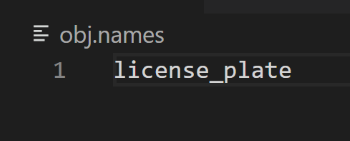

Example for multiclass obj.names file:

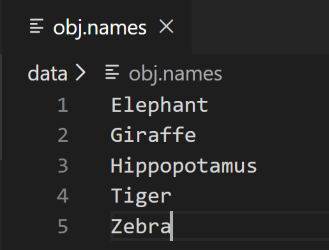

You will also create a **obj.data** file and fill it in like this (change your number of classes accordingly, as well as your backup location)

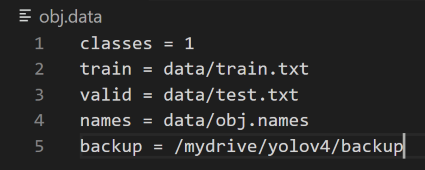

This backup path is where we will save the weights to of our model throughout training. Create a backup folder in your google drive and put its correct path in this file.

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4/obj.names ./data
!cp /mydrive/yolov4/obj.data  ./data

## iii) Generating train.txt and test.txt


In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4/generate_train.py ./
!cp /mydrive/yolov4/generate_test.py ./

Now simply run both scripts to do the work for you of generating the two txt files.

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt



# Model Training


In [ ]:
import time
begin = time.time()

In [ ]:
# train your custom detector! (uncomment %%capture below if you run into memory issues or your Colab is crashing)
# %%capture
!./darknet detector train data/obj.data cfg/yolov4-tiny.cfg -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.734577), count: 1, class_loss = 0.113769, iou_loss = 0.221674, total_loss = 0.335443 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.854153), count: 3, class_loss = 0.740928, iou_loss = 3.535954, total_loss = 4.276882 
 total_bbox = 494721, rewritten_bbox = 0.000606 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.884368), count: 1, class_loss = 0.000114, iou_loss = 0.864032, total_loss = 0.864146 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.848060), count: 5, class_loss = 0.000903, iou_loss = 7.666283, total_loss = 7.667186 
 total_bbox = 494727, rewritten_bbox = 0.000606 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.855304), count: 2, class_loss = 0.018494, iou_loss = 0.848763, total_loss = 0.867257 
v3 (iou

In [ ]:
end = time.time()
print(end-begin)

5935.819673061371


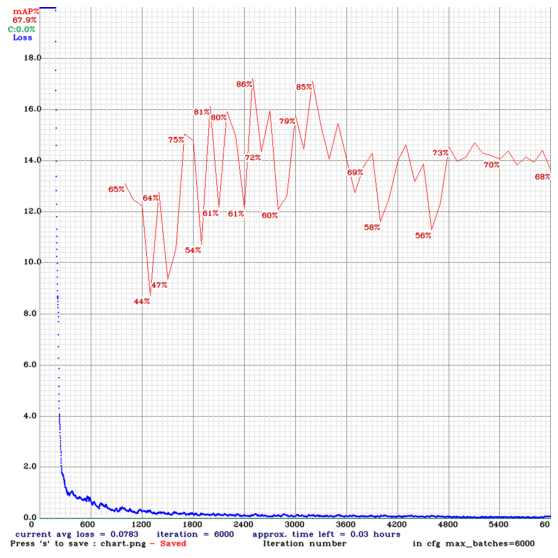

In [ ]:
# show chart.png of how custom object detector did with training
imShow('chart.png')

BEN: Insert description of image or other results as well. Ideally this graphic would have labels as well if possible.

In [ ]:
end = time.time()
print(end - begin)

6091.868052244186


Run the below code if training prematuraly stops

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
yolov4-obj
Couldn't open file: cfg/yolov4-obj.cfg


# Checking the Model's Mean Average Precision (mAP)


In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-tiny.cfg /mydrive/yolov4/backup/yolov4-tiny_6000.weights

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    416 x 416 x   3 ->  208 x 208 x  32 0.075 BF
   1 conv     64       3 x 3/ 2    208 x 208 x  32 ->  104 x 104 x  64 0.399 BF
   2 conv     64       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.797 BF
   3 route  2 		                       1/2 ->  104 x 104 x  32 
   4 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   5 conv     32       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  32 0.199 BF
   6 route  5 4 	                           ->  104 x 104 x  64 
   7 conv     64       1 x 1/ 1    104 x 104 x  64 ->  104 x 104 x  64 0.089 BF
   8 route  2 7 	    

BEN: Add a final section summarizing results or notebook